In [1]:
import spatialdata as sd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq
import anndata as ad
import os
BASE_DIR = '/lustre/scratch124/cellgen/haniffa/projects/developmental_fibroblasts/nobackup_output/nichecompasss/nichecompass/artifacts/spatial_reference_mapping/'


/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata

['20250901_080335XeniumHDCA_1024svg_n8',
 '20250906_163412XeniumBEACON_2000svg_n8_REFQ_FIGNICHES',
 '20250826_224328XeniumBEACON_2048svg_n8',
 '20250828_231337XeniumBEACON_2000svg_n4_REFQ',
 '20250828_124719XeniumBEACON_2000svg_n4_REFQ',
 '20250827_141545XeniumBEACON_2048svg_n8',
 '20250824_113459XeniumBEACON_1024svg_n8_REFQ',
 '20250908_094212XeniumBEACON_4000svg_n8_REFQ_FIG8',
 '20250826_091439XeniumBEACON_2048svg_n8',
 '20250825_224636XeniumBEACON_1024svg_n4_REFQ',
 '20250828_093522XeniumBEACON_1500svg_n4_REFQ',
 '20250829_065018XeniumHDCA_1024svg_n8',
 '20250911_210742XeniumHDCA_1024svg_n16',
 '20250817_154144XeniumBEACON_1024svg_n8',
 '20250827_142632XeniumBEACON_300svg_n8',
 '20250824_104304XeniumBEACON_1024svg_n8_REFQ',
 '20250909_114615XeniumBEACON_2000svg_n8_REFQ_presept',
 '20250828_124042XeniumBEACON_3000svg_n8',
 '20250816_144040XeniumBEACON_1024svg_n8',
 '20250827_112854XeniumBEACON_1024svg_n4_REFQ',
 '20250824_134605XeniumBEACON_2048svg_n4',
 '20250827_230325XeniumBEACON_

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#%matplotlib inline
sc.settings.figdir = "fig3"
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(8,8))


# NEW REF QUERY

In [11]:
PATH = '/nfs/team298/ls34/adult_skin/final_adatas/adata_nicheembeddings.h5ad'
adata=sc.read_h5ad(PATH)


/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


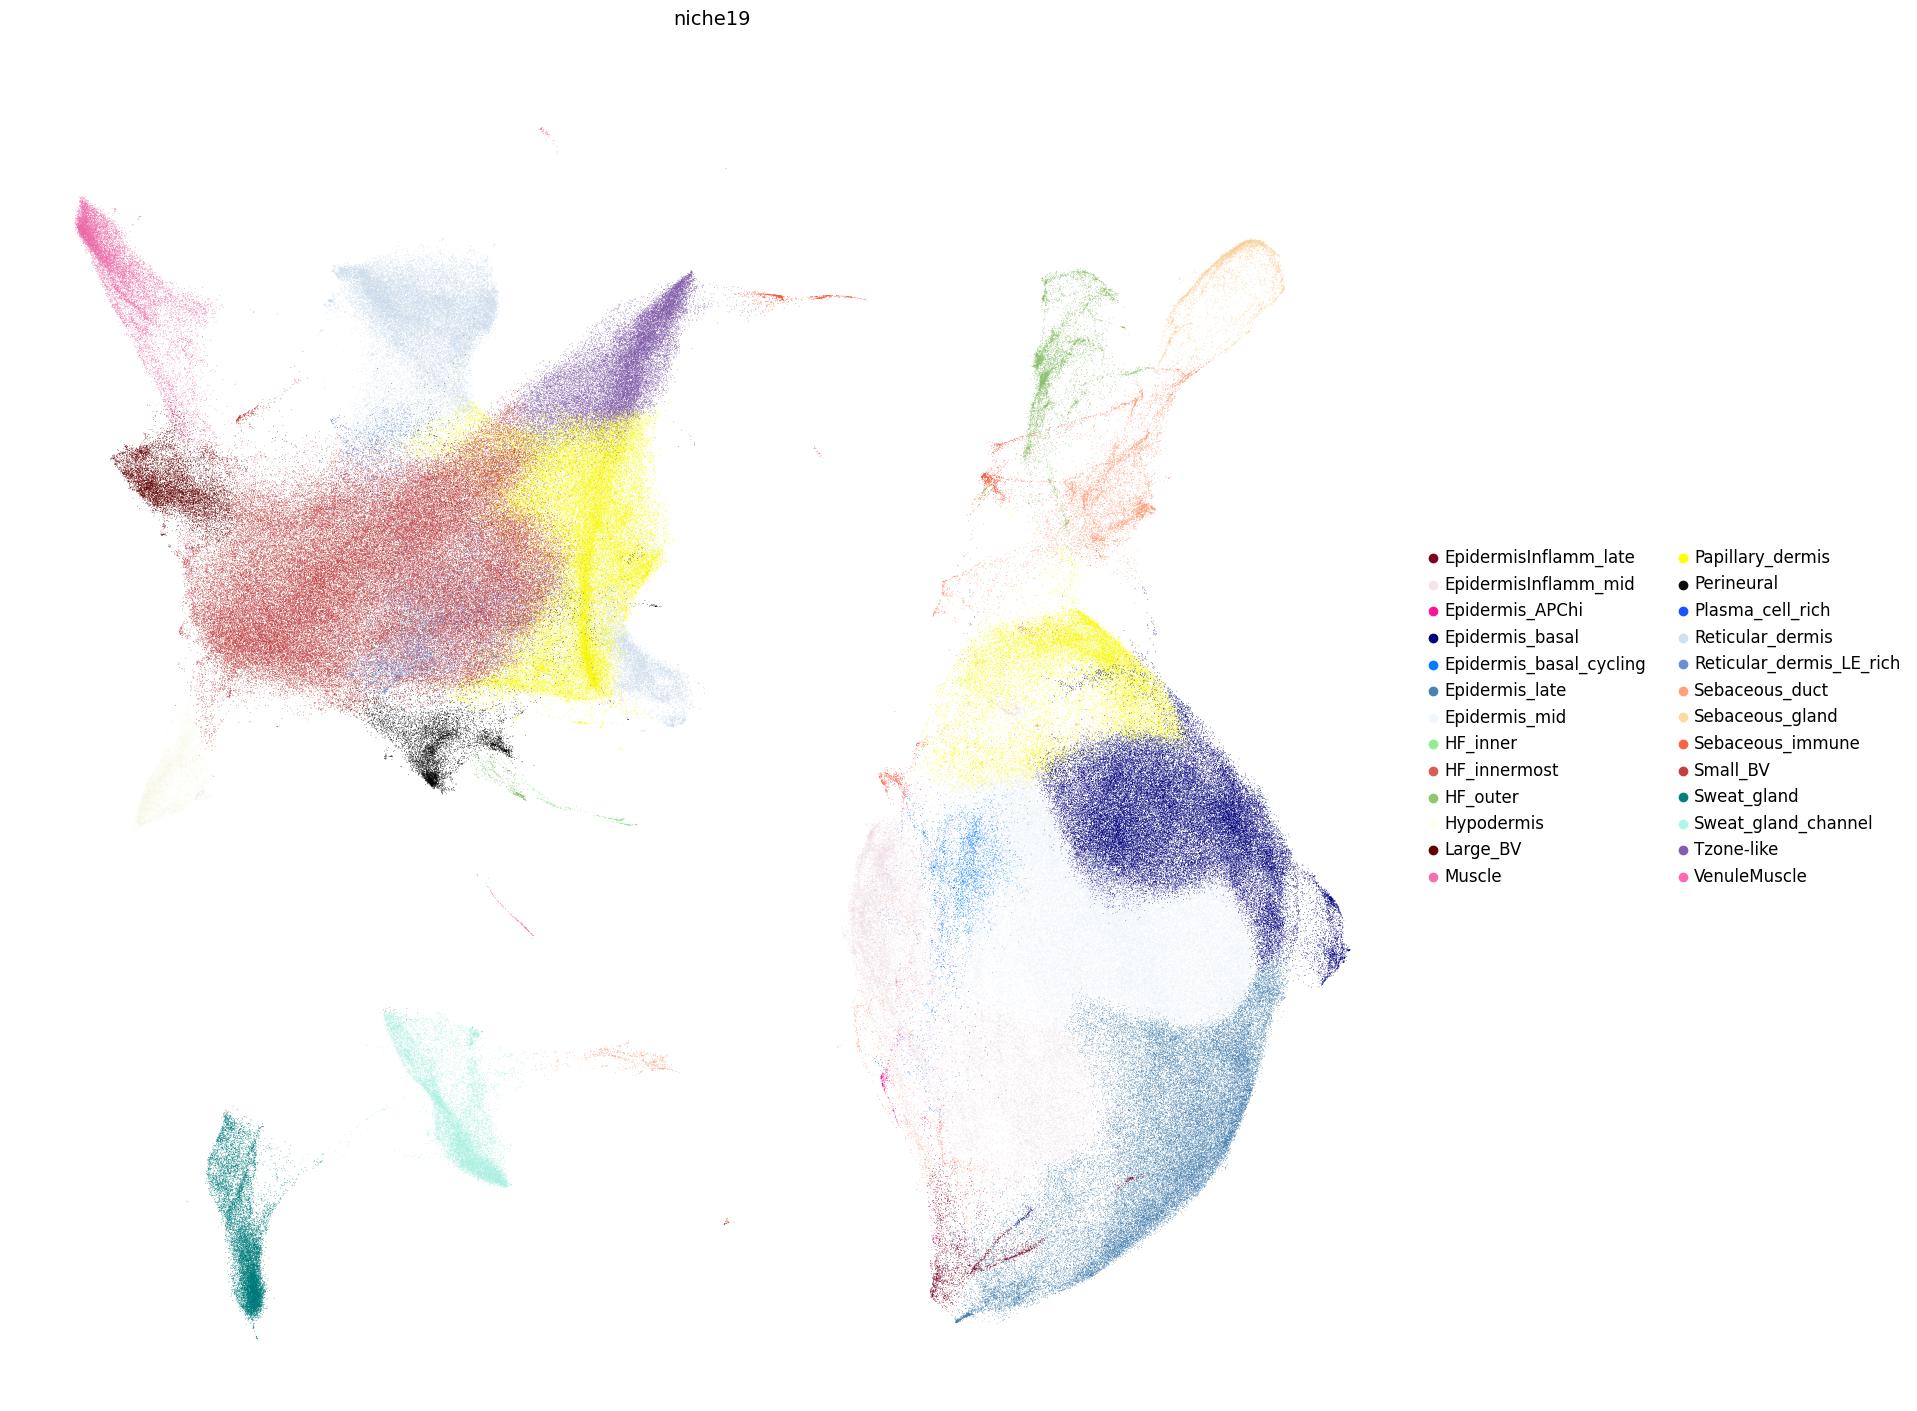

In [12]:
sc.settings.set_figure_params(dpi=50, dpi_save=300, facecolor="white", frameon=False, figsize=(18,18))


sc.pl.umap(adata[adata.obs["Site_status_binary"].isin(["Lesional", "Non-lesional"])], 
           color=['niche19'  ],
           size=1, 
           #legend_loc="on data", 
           vmax="p99", 
           legend_fontsize=12,
                     legend_fontoutline=2,
           edgecolor='black',
           linewidth=0.001,
                      save="3a_nichecolors.pdf"


          )

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_utils.py:432: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


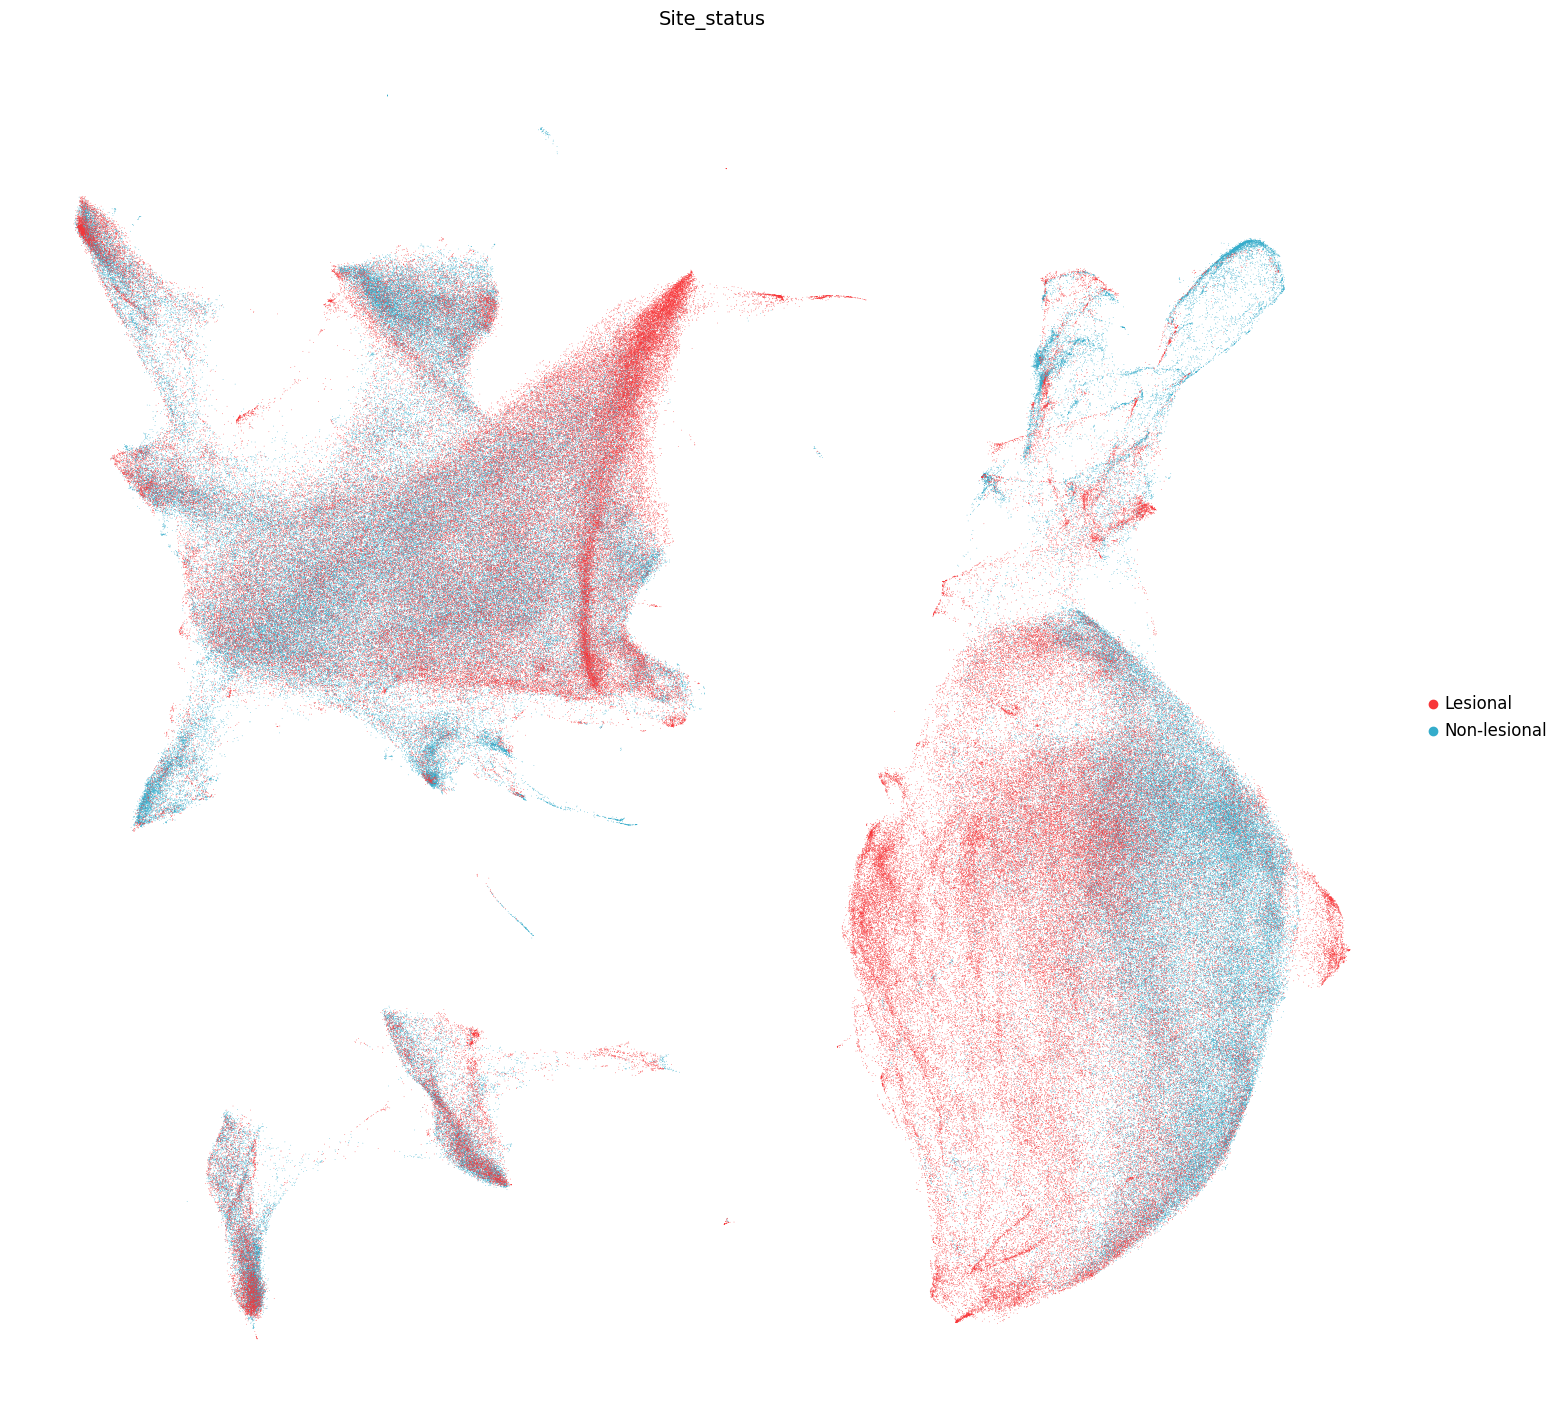

In [13]:
sc.pl.umap(adata[adata.obs["Site_status_binary"].isin(["Lesional", "Non-lesional"])], 
           color=['Site_status'  ],
           size=1, 
           #legend_loc="on data", 
           vmax="p99", 
           legend_fontsize=12,
          legend_fontoutline=2,           
           palette=[   "#f83639" , "#34accb",],
                                 save="3a_sitestatus.pdf"

    # "Healthy":  "#addfee",          # Assuming "Healthy" was intended
    # "Nonlesional": "#34accb",  # "#b0e1f0",
    # "AD_lesional": "#f83639" , 
    # "Psoriasis_lesional": "#fcc9c7",


          )

In [ ]:
STOP

In [14]:
adata_i=adata[adata.obs["niche19"].str.startswith("Seba")]

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


neighbors done 20
UMAP done
1
1


/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Catego

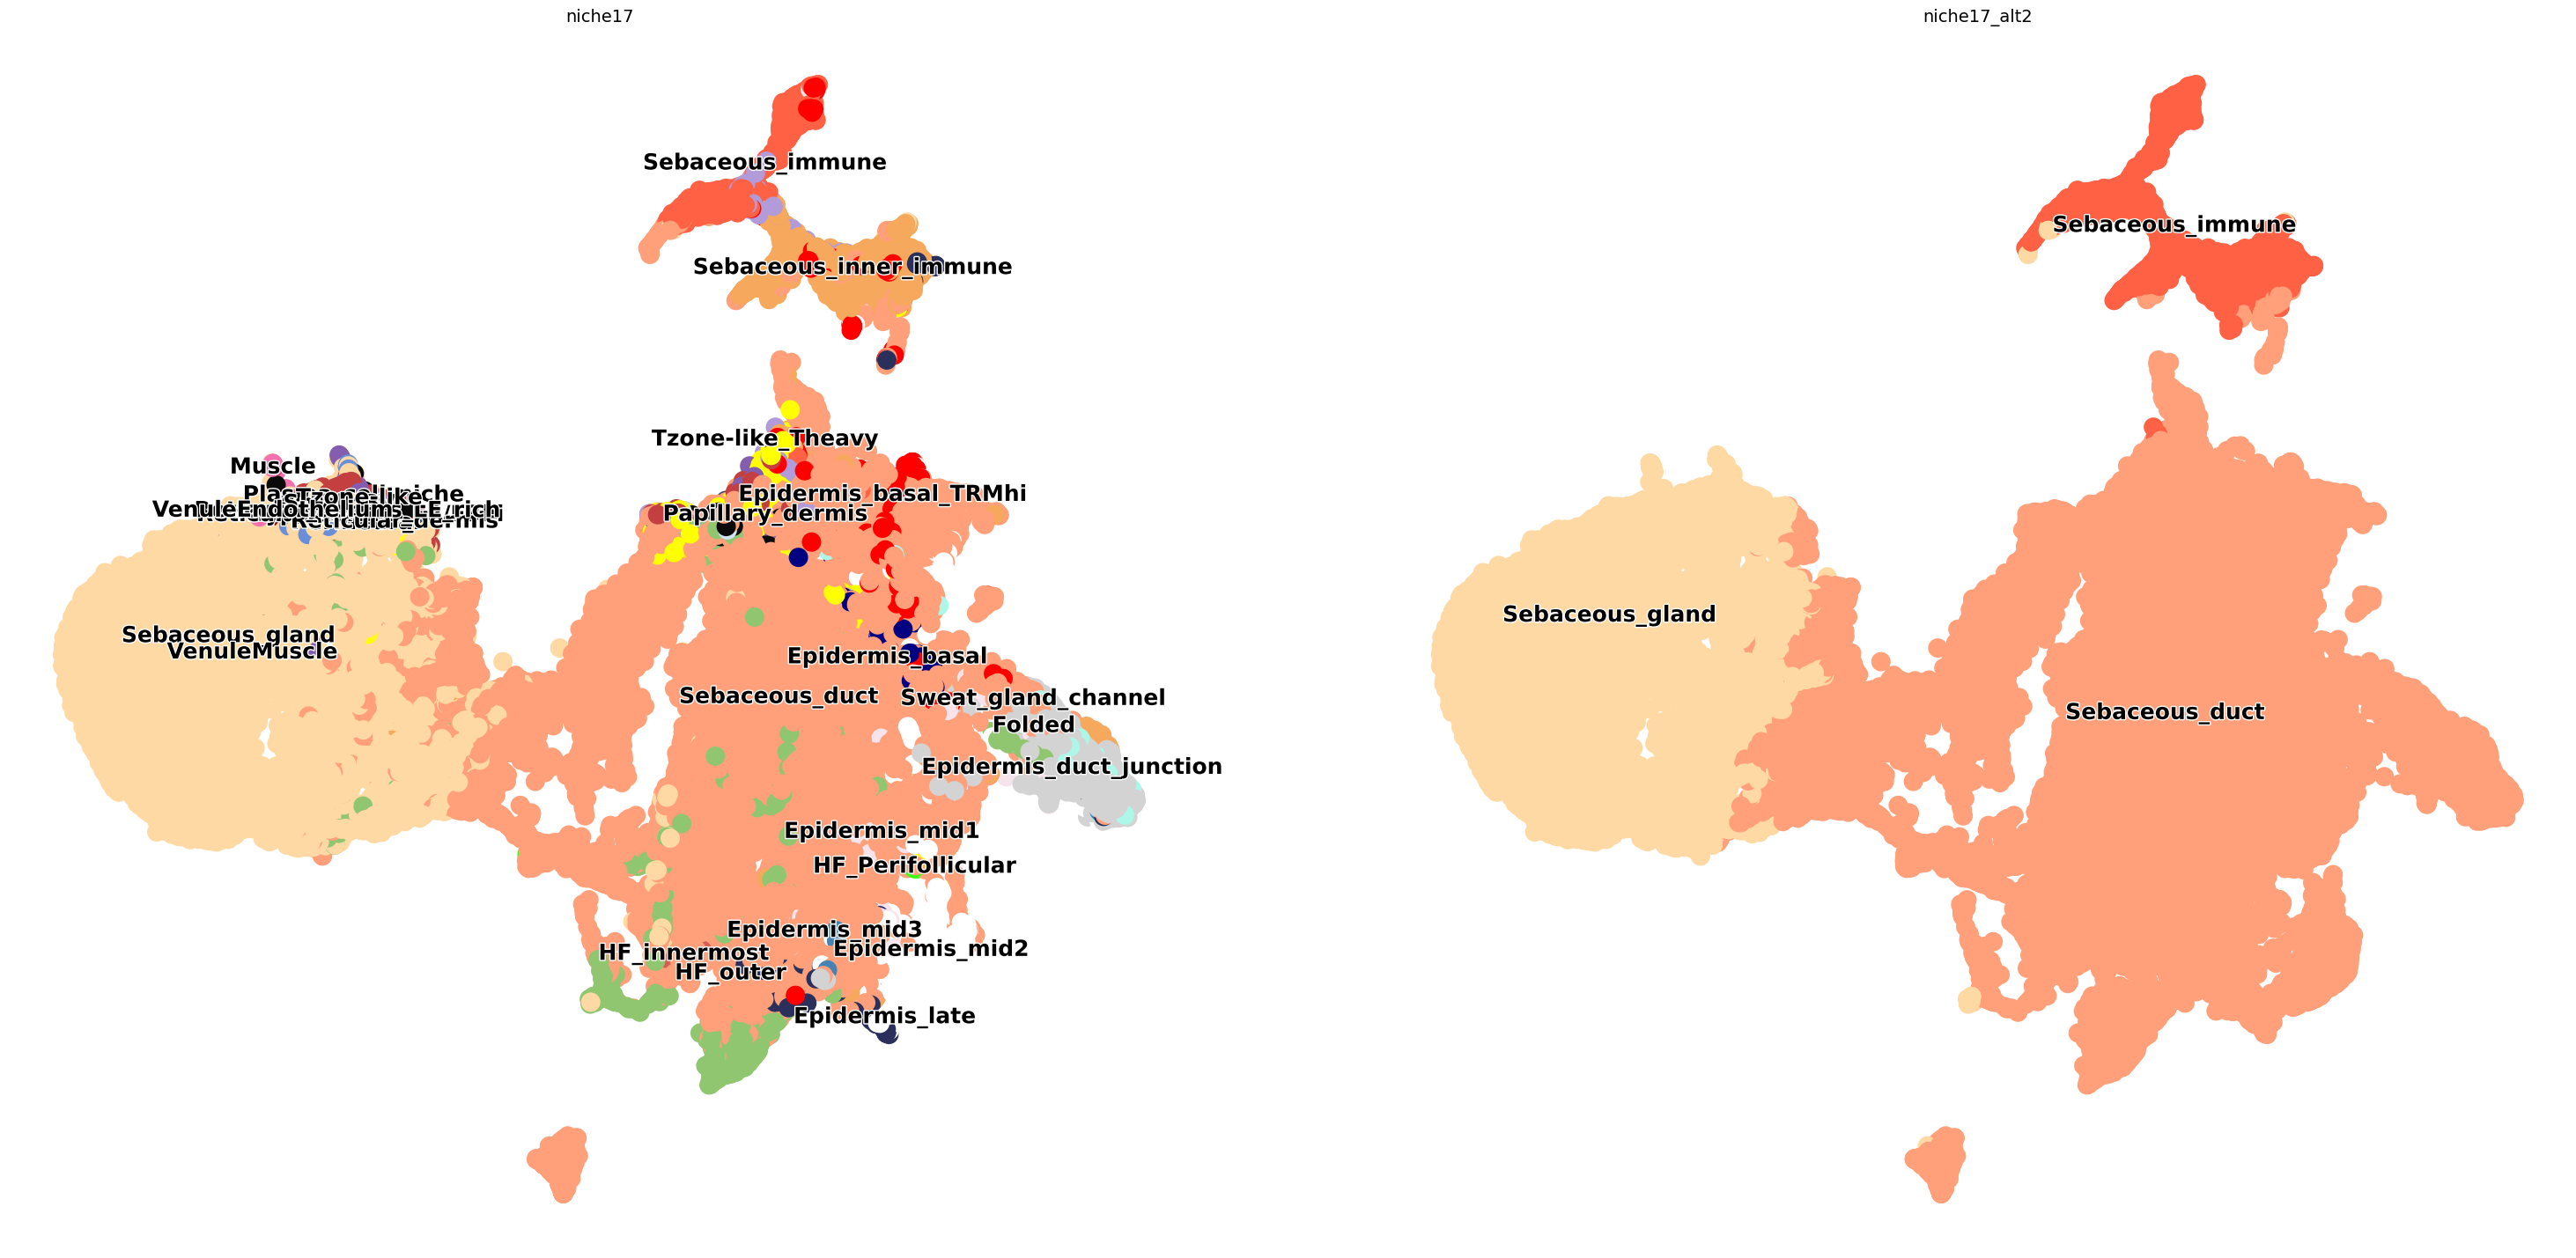

In [15]:
latent_key = "nichecompass_latent"
# adata_i=adata[(adata.obs["niche17_alt2"] == "Sebaceous_immune")       |
#               (adata.obs["niche17_alt2"] == "Sebaceous_immune_inner")       |
#               (adata.obs["niche17_alt2"] == "Sebaceous_immune_basalimmune")      
#              ]
# adata_i.shape

N_NEIGHBORS=20
sc.pp.neighbors(adata_i, n_neighbors=N_NEIGHBORS, use_rep =latent_key ,key_added=f"n_{N_NEIGHBORS}")
print(f"neighbors done", N_NEIGHBORS)
sc.tl.umap(adata_i, min_dist=0.1, neighbors_key =f"n_{N_NEIGHBORS}") 
print(f"UMAP done")
try:
    del(adata_i.uns["lvl4_annotation_colors"])
except:
    print(1)
try:
    del(adata_i.uns["final_labels2_colors"])
except:
    print(1)
sc.pl.umap(
    adata_i,#[adata.obs["lvl4_annotation"].isin(counts[counts >=50].index)],
    color=[  "niche17", "niche17_alt2" ],
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=18,
    s=1000,
    legend_fontoutline=2,
  #  save="supplementary_integration.pdf"
)

IOStream.flush timed out
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
 

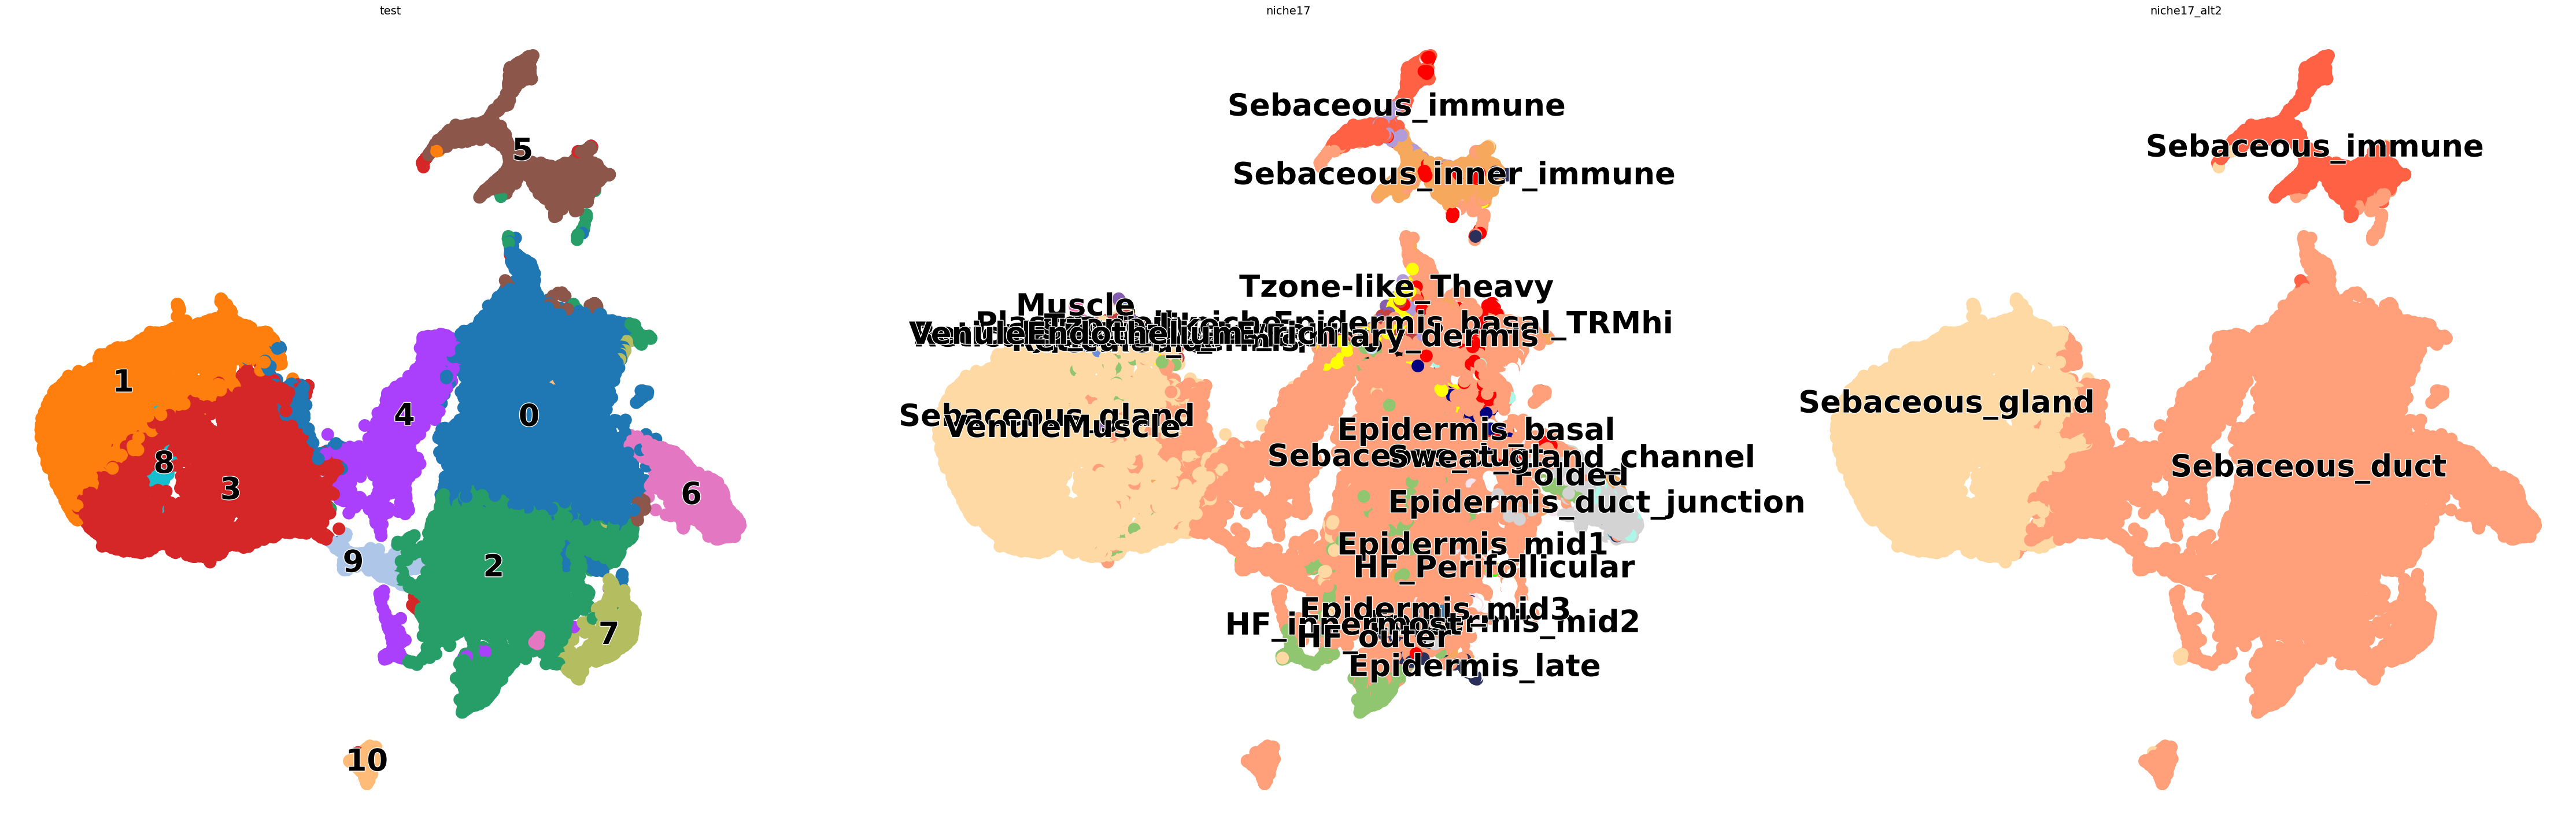

umap done


In [16]:
sc.tl.leiden(adata_i,
         neighbors_key=f"n_{N_NEIGHBORS}",
        key_added="test",
          resolution=0.2,
        # restrict_to=("leiden_res1",["2"]), 
         )
sc.pl.umap(
    adata_i,#[adata.obs["lvl4_annotation"].isin(counts[counts >=50].index)],
    color=[   "test", "niche17", "niche17_alt2"],
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=38,
    s=1000,
    legend_fontoutline=2,
  #  save="supplementary_integration.pdf"
)
print("umap done")




/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Catego

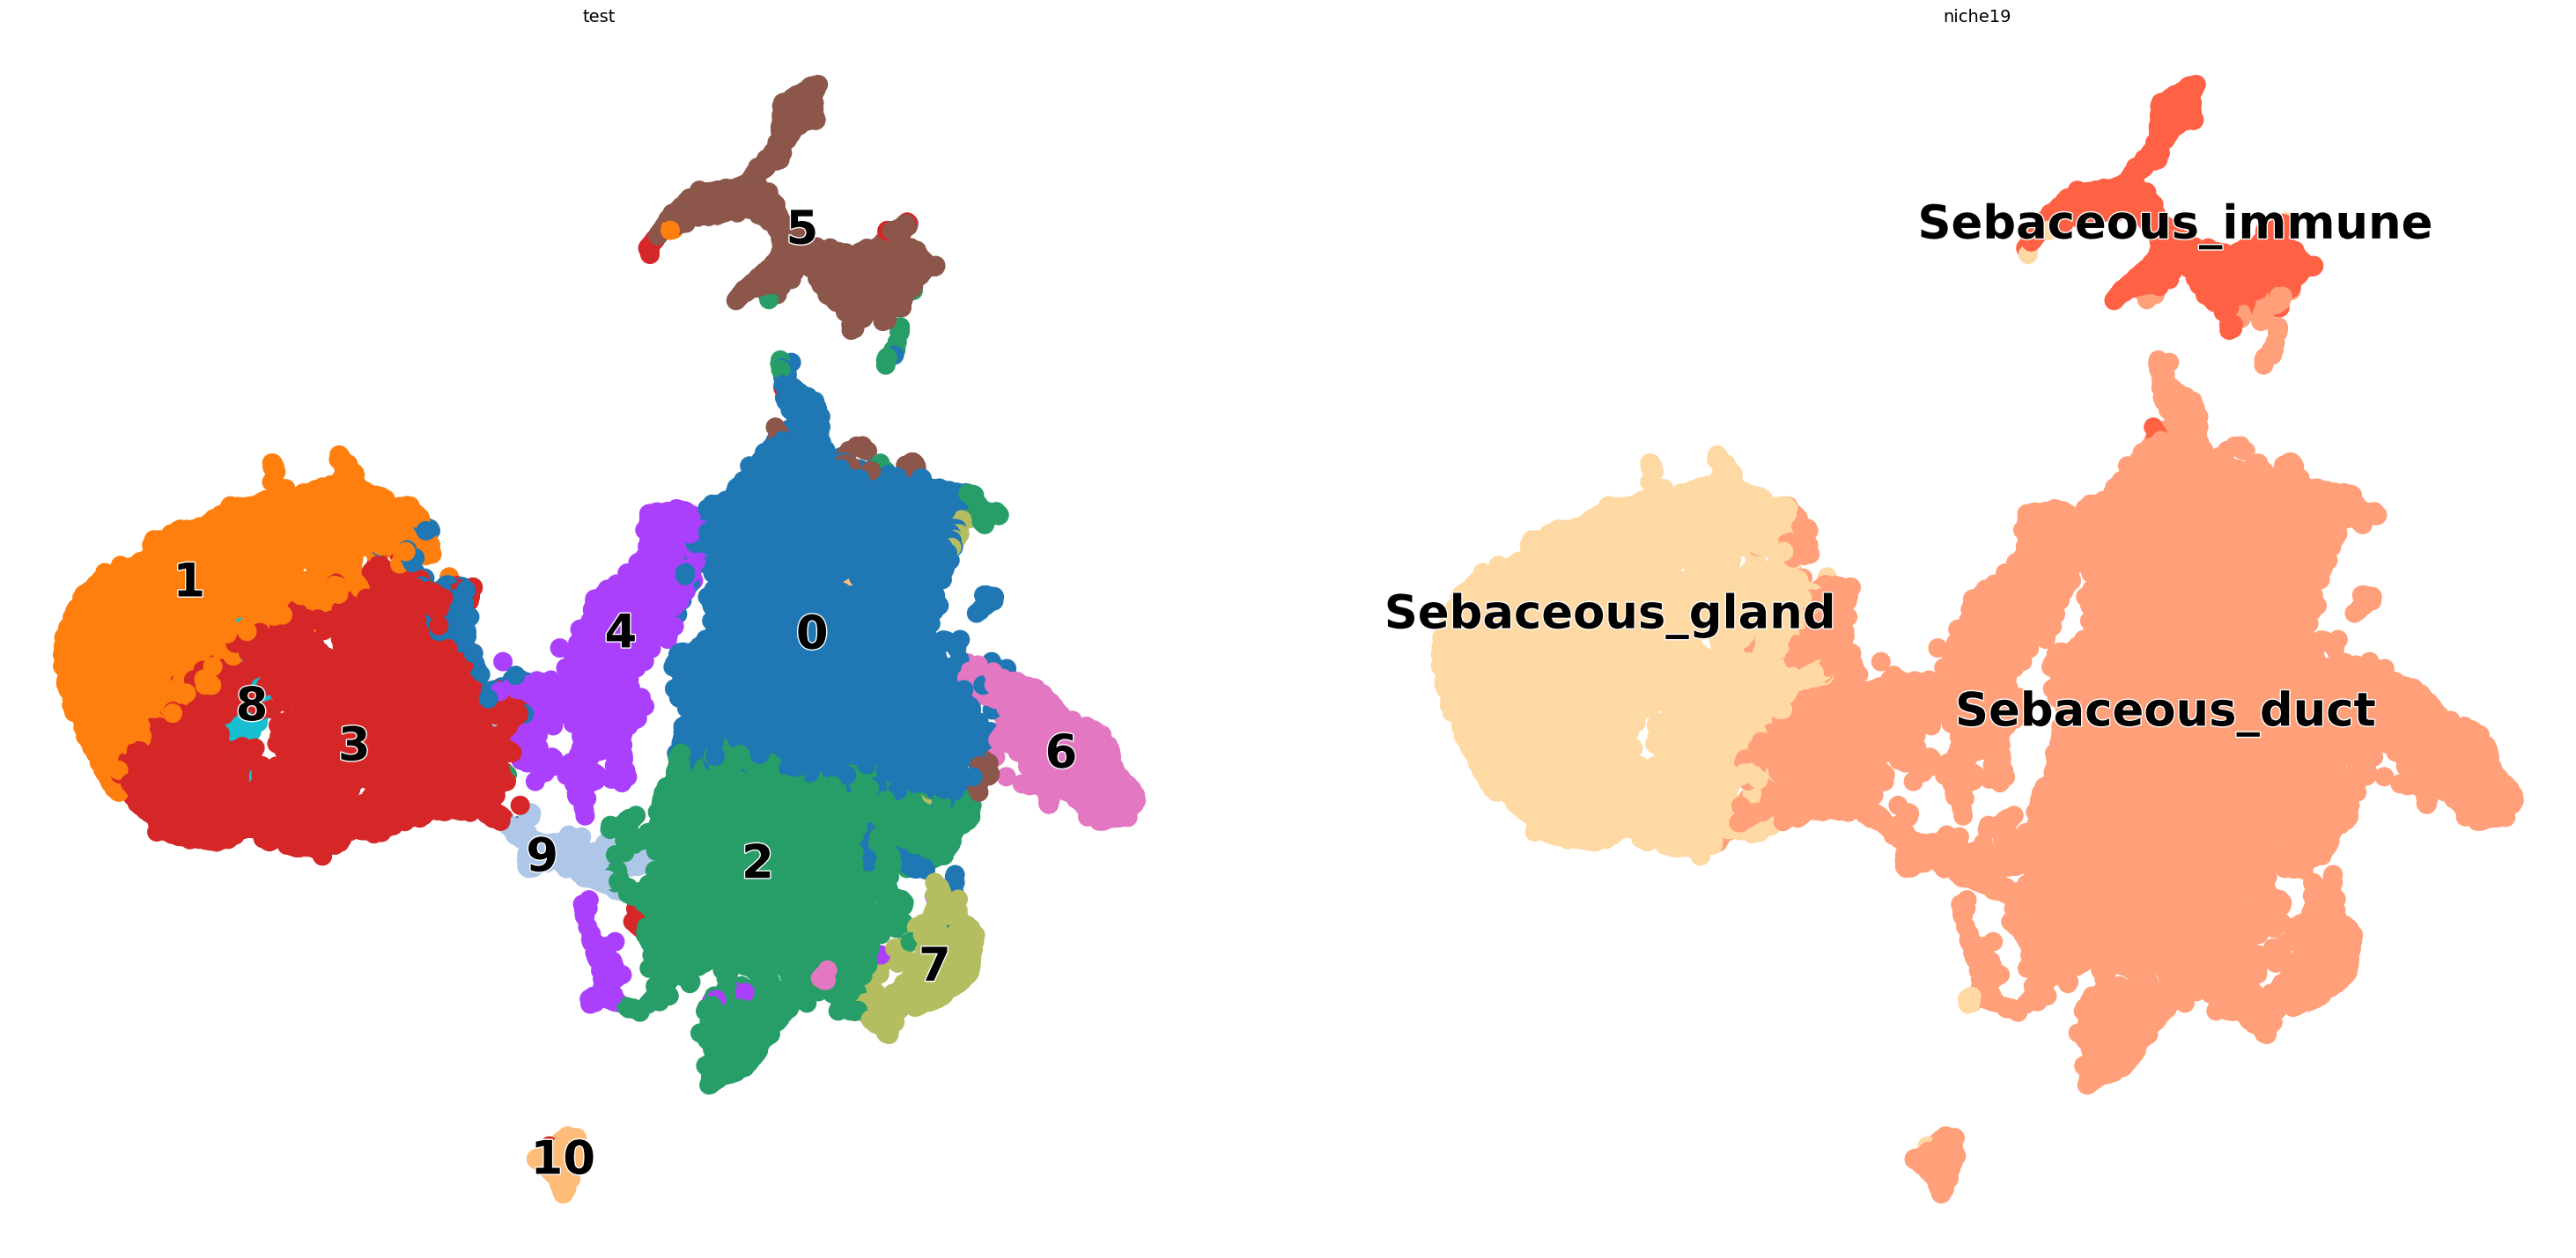

umap done


In [17]:
sc.pl.umap(
    adata_i,#[adata.obs["lvl4_annotation"].isin(counts[counts >=50].index)],
    color=[   "test", "niche19", ],
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=38,
    s=1000,
    legend_fontoutline=2,
  #  save="supplementary_integration.pdf"
)
print("umap done")




In [24]:
adata_i[adata_i.obs["test"]=="5"].obs.info_id6.value_counts()

info_id6
BK22_Lesional Baseline                    961
BK30_Non-lesional Baseline                440
BK51_wk8 Relapse                          363
Lesional_CE4-SKI-27-FO-4-S22-A2           305
Lesional_CE4-SKI-27-FO-4-S22_replicate    290
BK30_Week 12                              282
BK30_Lesional Baseline                    267
BK24_Non-lesional Baseline                182
BK25_Week 12                              113
BK18_Lesional Baseline                     56
BK27_Week 12                               23
3D_BK25_week12-D2                          10
3D_BK25_week12-C2                           6
BK25_Lesional Baseline                      4
3D_BK22_Lesional_baseline-A1                4
3D_BK25_week12-B2                           3
BK30_Day 14                                 2
BK22_Non-lesional Baseline                  1
BK18_Week 12                                1
Name: count, dtype: int64

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


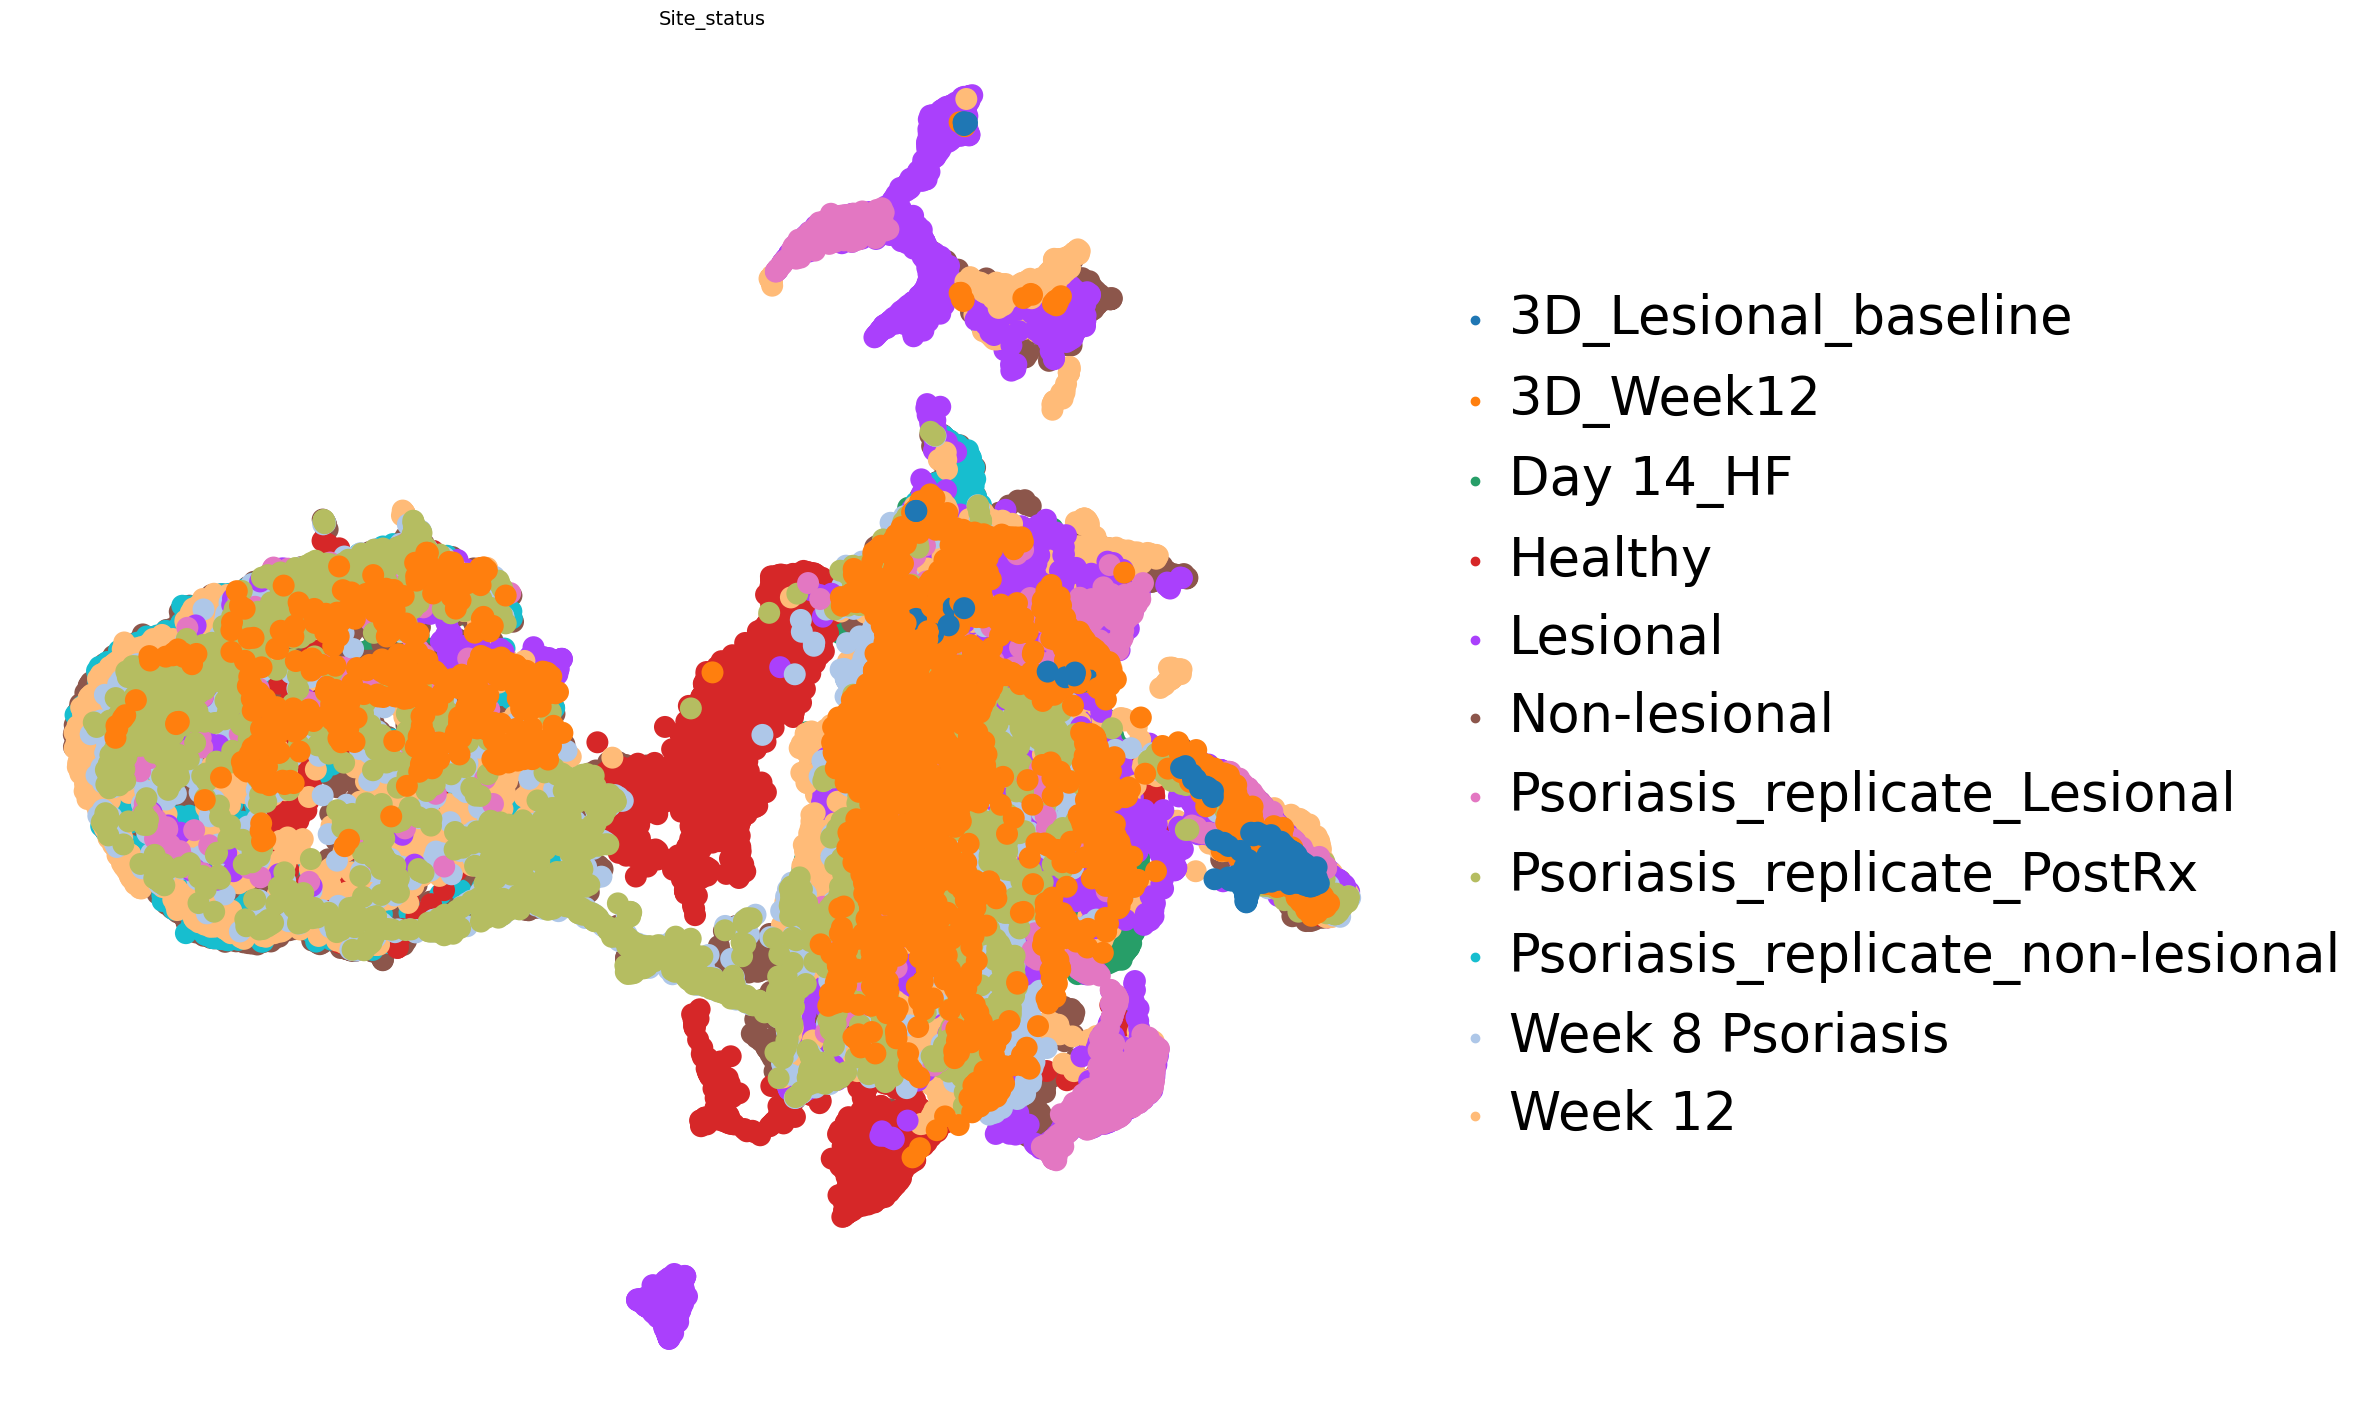

umap done


In [22]:
sc.pl.umap(
    adata_i,#[adata.obs["lvl4_annotation"].isin(counts[counts >=50].index)],
    color=[   "Site_status"  ],
    show=True,
    frameon=False,
    #legend_loc= "on data",
    legend_fontsize=38,
    s=1000,
    legend_fontoutline=2,
  #  save="supplementary_integration.pdf"
)
print("umap done")




In [18]:
adata_i[adata_i.obs["test"]=="10"].obs.info_id6.value_counts()

info_id6
Lesional_CE4-SKI-27-FO-4-S22-A2    470
Name: count, dtype: int64

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


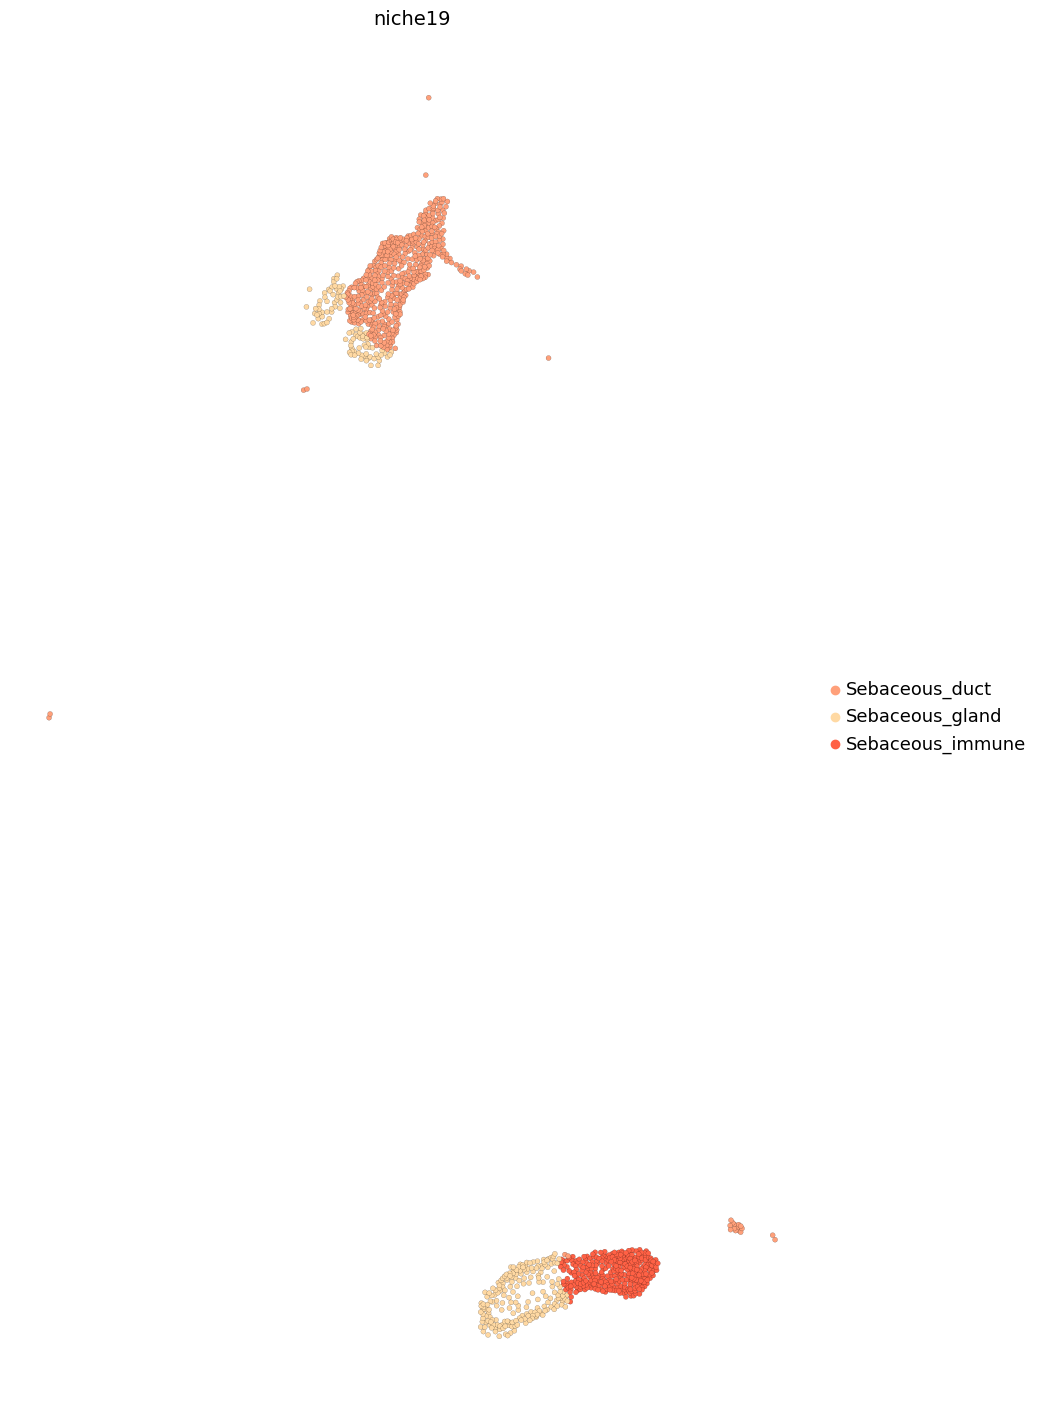

/tmp/ipykernel_1529688/55001312.py:42: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  ad_i.obs["test2"]=[x if x=="10" else "other" for x in ad_i.obs["test"]]
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


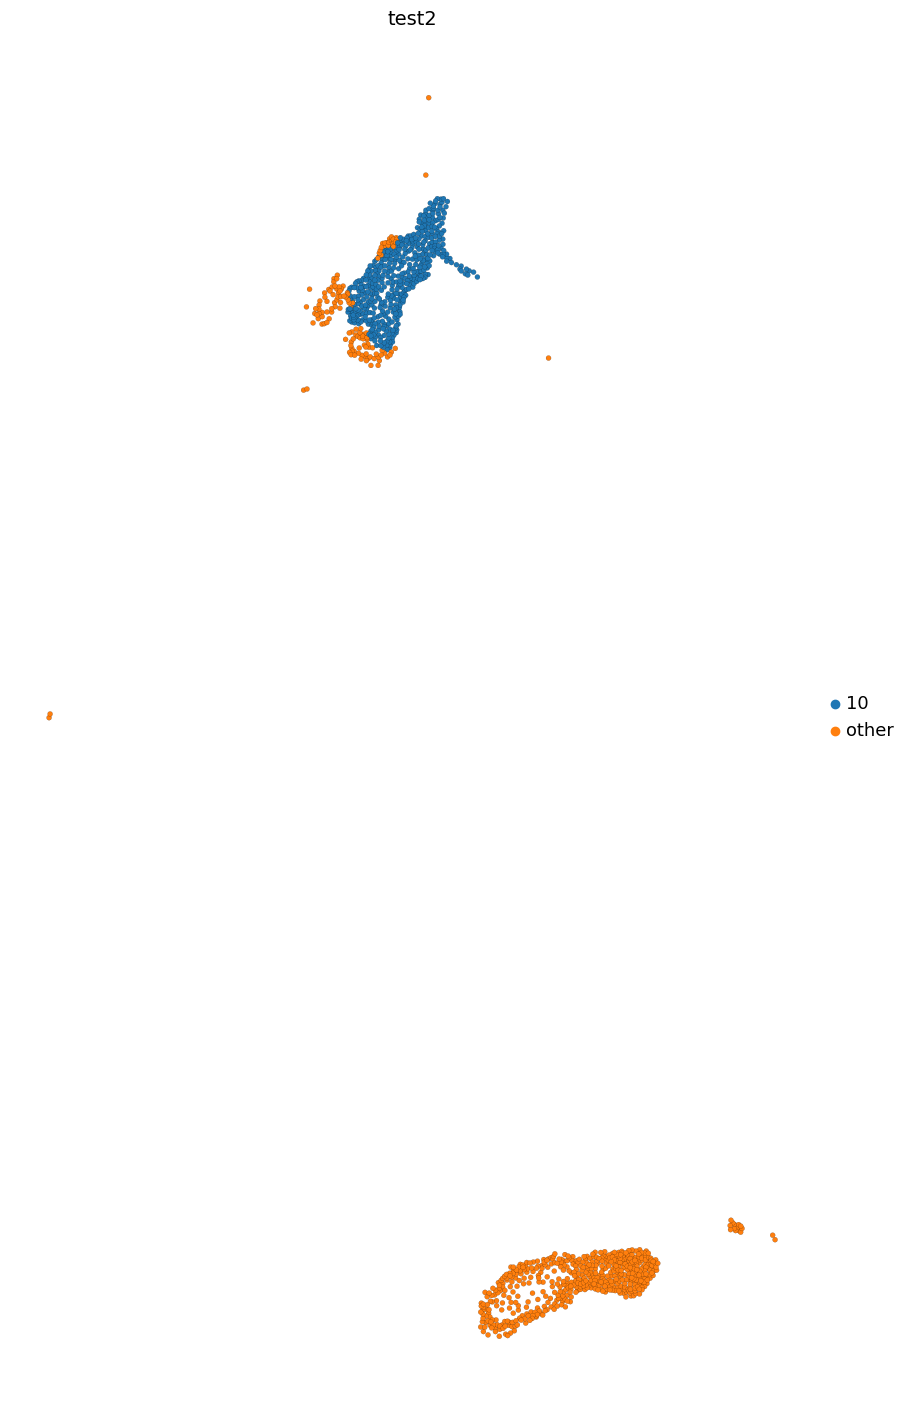

In [21]:
#sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18,18))

fallback = "#BFBFBF"

# # make column categorical (once)
# adata_5k.obs["test"] = adata_5k.obs["test"].astype("category")

# cat_order   = list(adata_5k.obs["test"].cat.categories)
# palette_vec = [palette_dict.get(c, fallback) for c in cat_order]   # list, not dict
# adata_5k.uns["test_colors"] = palette_vec


for sec in ["Lesional_CE4-SKI-27-FO-4-S22-A2"]:
    ad_i = adata_i[adata_i.obs["info_id6"] == sec]
    #if CELL_TYPE not in ad_i.obs["test"].unique():
    #    continue
    #n = (ad_i.obs["test"] == CELL_TYPE).sum()
    #print(ad_i.shape, f"has cells ({CELL_TYPE}): ", n)
    #if n < MIN_CELL_COUNT:
    #    continue

    # STATUS = ad_i.obs["Timepoint"].iloc[0]
    # tissue_section_id = ad_i.obs["info_id2"].iloc[0]
    # print(tissue_section_id)
#    
    sc.pl.spatial(
                    ad_i,
                    #library_id="spatial",
                    #shape=None,
                    color="niche19",
                    spot_size=12,
                    edgecolor="black",
                    linewidth=0.1,
                    vmax=1,
                   # title=STATUS,# "\n" + tissue_section_id,
                    #save="fig1c.pdf"
                   # palette=cmap,

                    #ax=ax,
                    #legend_loc="on data"  # Disable the legend for each subplot
                )
    ad_i.obs["test2"]=[x if x=="10" else "other" for x in ad_i.obs["test"]]
    sc.pl.spatial(
                    ad_i,
                    #library_id="spatial",
                    #shape=None,
                    color="test2",
                    spot_size=12,
                    edgecolor="black",
                    linewidth=0.1,
                    vmax=1,
                   # title=STATUS,# "\n" + tissue_section_id,
                    #save="fig1c.pdf"
                   # palette=cmap,

                    #ax=ax,
                    #legend_loc="on data"  # Disable the legend for each subplot
                )
    
#     sc.pl.spatial(
#                     ad_i,
#                     #library_id="spatial",
#                     #shape=None,
#                     color="niche19",
#                     spot_size=10,
#                     edgecolor="black",
#                     linewidth=0.05,
#                     vmax=1,
#                     title=STATUS,# + "\n" + tissue_section_id,
#                     save="fig1c_smaller.pdf"
#                    # palette=cmap,

#                     #ax=ax,
#                     #legend_loc="on data"  # Disable the legend for each subplot
#                 )
  

#sc.settings.set_figure_params(dpi=100, dpi_save=300, facecolor="white", frameon=False, figsize=(18,18))

    
    
    